# Election Poll Data Analysis

In [97]:
#Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

#Imports to grab and parse data from the web
import requests

from StringIO import StringIO

In [98]:
#url for the poll data
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

#Using requests to get the data in text form
source = requests.get(url).text

#Using String IO to prevent IO errors with pandas
poll_data = StringIO(source)

In [99]:
#Reading the csv object into a pandas dataframe
poll_df = pd.read_csv(poll_data)

In [100]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 17 columns):
Pollster                  1230 non-null object
Start Date                1230 non-null object
End Date                  1230 non-null object
Entry Date/Time (ET)      1230 non-null object
Number of Observations    825 non-null float64
Population                1230 non-null object
Mode                      1230 non-null object
Trump                     1230 non-null float64
Clinton                   1230 non-null float64
Other                     819 non-null float64
Undecided                 1177 non-null float64
Pollster URL              1230 non-null object
Source URL                1230 non-null object
Partisan                  1230 non-null object
Affiliation               1230 non-null object
Question Text             506 non-null object
Question Iteration        1230 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 163.4+ KB


In [101]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,1336.0,Likely Voters,Internet,38.0,42.0,8.0,12.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
1,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - Democrat,Internet,5.0,81.0,6.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
2,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - Republican,Internet,78.0,7.0,7.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
3,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - independent,Internet,36.0,22.0,19.0,23.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
4,Morning Consult,2016-09-26,2016-09-27,2016-09-28T16:28:22Z,1253.0,Likely Voters,Internet,41.0,45.0,NaN,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/09/28/clinton-...,Nonpartisan,None,If the 2016 presidential election were held to...,1


### Who was being polled and what was their party affiliation?

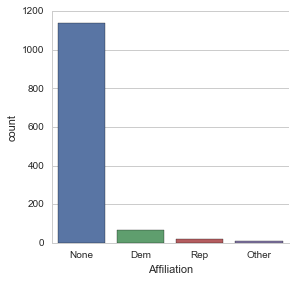

In [102]:
sns.factorplot('Affiliation',data=poll_df,kind='count')

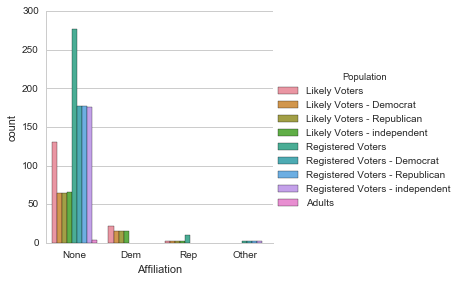

In [103]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

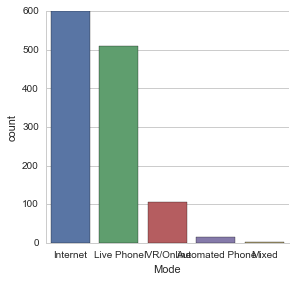

In [108]:
sns.factorplot('Mode',data=poll_df,kind='count')

### Did the poll results favour Clinton or Trump?

In [104]:
avg = pd.DataFrame(poll_df.mean())

avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

avg

,0
Trump,40.634959
Clinton,42.686179
Other,6.108669
Undecided,10.050127


In [109]:
std = pd.DataFrame(poll_df.std())

std.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

std

,0
Trump,23.530551
Clinton,25.291930
Other,5.205711
Undecided,6.391430


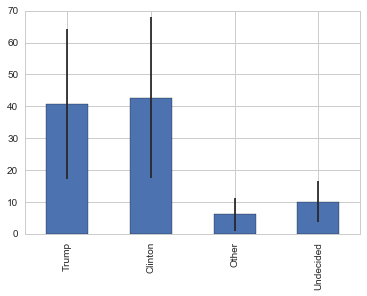

In [110]:
avg.plot(yerr=std,kind='bar',legend=False)

In [111]:
poll_avg = pd.concat([avg,std],axis=1)

poll_avg.columns = ['Average','Stdev']

poll_avg

,Average,Stdev
Trump,40.634959,23.530551
Clinton,42.686179,25.291930
Other,6.108669,5.205711
Undecided,10.050127,6.391430


In [112]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,1336.0,Likely Voters,Internet,38.0,42.0,8.0,12.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
1,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - Democrat,Internet,5.0,81.0,6.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
2,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - Republican,Internet,78.0,7.0,7.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
3,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - independent,Internet,36.0,22.0,19.0,23.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1
4,Morning Consult,2016-09-26,2016-09-27,2016-09-28T16:28:22Z,1253.0,Likely Voters,Internet,41.0,45.0,NaN,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/09/28/clinton-...,Nonpartisan,None,If the 2016 presidential election were held to...,1


### How did voter sentiment change over time?

In [113]:
from datetime import datetime

poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,1336.0,Likely Voters,Internet,38.0,42.0,8.0,12.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1,0.04
1,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - Democrat,Internet,5.0,81.0,6.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1,0.76
2,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - Republican,Internet,78.0,7.0,7.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1,-0.71
3,Ipsos/Reuters,2016-09-27,2016-09-28,2016-09-28T21:21:35Z,NaN,Likely Voters - independent,Internet,36.0,22.0,19.0,23.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016-Reut...,Nonpartisan,None,If the 2016 presidential election were being h...,1,-0.14
4,Morning Consult,2016-09-26,2016-09-27,2016-09-28T16:28:22Z,1253.0,Likely Voters,Internet,41.0,45.0,NaN,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/09/28/clinton-...,Nonpartisan,None,If the 2016 presidential election were held to...,1,0.04


In [114]:
#Grouping polls by the start data
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.tail()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
225,2016-09-20,1000.000000,44.750000,37.750000,5.000000,4.750000,1.000000,-0.070000
226,2016-09-21,1081.000000,45.666667,45.000000,3.666667,4.000000,1.333333,-0.006667
227,2016-09-22,761.090909,42.382353,42.205882,4.600000,7.382353,1.500000,-0.001765
228,2016-09-26,626.250000,41.125000,40.750000,4.250000,11.625000,1.500000,-0.003750
229,2016-09-27,1336.000000,39.250000,38.000000,10.000000,12.750000,1.000000,-0.012500


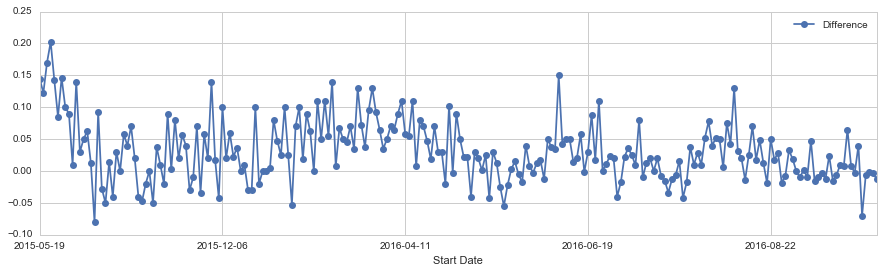

In [115]:
poll_df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-')

### Can we see an effect in the polls from the debates?

In [116]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print "First September Index: " + str(min(xlimit))
print "Last (Available) September Index: "+ str(max(xlimit))

First September Index: 209
Last (Available) September Index: 229


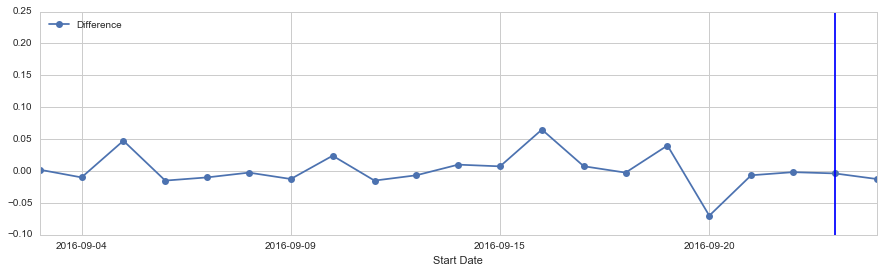

In [117]:
poll_df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-',xlim=(209,229))

#Vertical line for debate date
plt.axvline(x=228)